# Orders of magnitude

This short chapter is about **thinking in scales**.

You will learn how to:
- write numbers in **scientific notation**,
- compare quantities by **factors of ten** (“within an order of magnitude”),
- use **base-10 logarithms** as a *scale*,
- do quick back-of-the-envelope computations
- and apply it to a tiny ecological-economics example with **log–log plots**.

## 1) Why orders of magnitude?

Many variables in ecological economics and sustainability science span large ranges:
- GDP per capita (thousands to tens of thousands of USD),
- population (thousands to billions),
- emissions (per person or per country) (kg to Gt).
- national energy consumption (PJ/year),
- national material use (tons/year)

If we plot or compare these values on a normal (linear) scale, the small stuff disappears.
A **logarithmic scale** fixes this by turning multiplicative gaps (×10, ×100, ×1000) into additive steps (+1, +2, +3).

## 2) Scientific notation: `a × 10^b`

Any positive number can be written as

\$
n = a\times 10^b,
\$

where:
- the exponent **`b`** is an integer, and
- the mantissa **`a`** is a number around 1 (for example between 1 and 10).

Examples:
- 3,200 = 3.2 × 10³  
- 0.007 = 7 × 10⁻³  
- 81,000,000 = 8.1 × 10⁷

This representation makes scale comparisons easy: the exponent `b` tells you roughly “how many zeros.”


In [1]:
import math

def sci(n: float):
    """Return (a, b) such that n = a * 10**b with 1 <= |a| < 10 for n != 0."""
    if n == 0:
        return 0.0, 0
    sign = -1 if n < 0 else 1
    n_abs = abs(n)
    b = int(math.floor(math.log10(n_abs)))
    a = sign * (n_abs / (10 ** b))
    # fix potential edge case where a == 10 due to floating error
    if abs(a) >= 10:
        a /= 10
        b += 1
    return a, b

for x in [3200, 0.007, 8.1e7, 999, 1000, 0.2]:
    a, b = sci(x)
    print(f"{x:g} = {a:.3g} × 10^{b}")


3200 = 3.2 × 10^3
0.007 = 7 × 10^-3
8.1e+07 = 8.1 × 10^7
999 = 9.99 × 10^2
1000 = 1 × 10^3
0.2 = 2 × 10^-1


## 3) “Within an order of magnitude” = “within a factor of 10”

Two positive numbers `x` and `y` are **within an order of magnitude** if the larger is **less than 10 times** the smaller:

\$
\frac{\max(x,y)}{\min(x,y)} < 10.
\$

So:
- 2 and 9 are within an order of magnitude (9/2 = 4.5),
- 2 and 20 are also within an order of magnitude (20/2 = 10 **is right on the boundary** — some conventions include it, some don’t),
- 2 and 200 are *not* (200/2 = 100).

The exact boundary convention matters less than the **habit**: asking “is this a ×2 difference, ×10, ×100?”.


In [2]:
def within_one_order(x, y, inclusive=False):
    x, y = float(x), float(y)
    if x <= 0 or y <= 0:
        raise ValueError("Use positive numbers for order-of-magnitude comparisons.")
    r = max(x, y) / min(x, y)
    return r <= 10 if inclusive else r < 10

pairs = [(2,9), (2,20), (2,200)]
for x,y in pairs:
    print(x, y, "->", within_one_order(x,y), "(strict) ;", within_one_order(x,y, inclusive=True), "(inclusive)")


2 9 -> True (strict) ; True (inclusive)
2 20 -> False (strict) ; True (inclusive)
2 200 -> False (strict) ; False (inclusive)


## 4) Logarithms as a scale ruler

The base-10 logarithm answers:

> “What power of 10 gives this number?”

\$
\log_{10}(10^b)=b.
\$

And the key identity:

\$
\log_{10}(x/y)=\log_{10}(x)-\log_{10}(y).
\$

So the **difference in orders of magnitude** between `x` and `y` is basically:

\$
\Delta \text{orders} \approx \log_{10}(x) - \log_{10}(y) = \log_{10}(x/y).
\$

Example: if `x/y = 1000`, then `log10(1000) = 3` → a **3-order-of-magnitude** difference.


In [3]:
import numpy as np

def orders_apart(x, y):
    x, y = float(x), float(y)
    if x <= 0 or y <= 0:
        raise ValueError("Use positive numbers.")
    return math.log10(x/y)

for x,y in [(2,20),(2,200),(5,50),(1,0.2)]:
    print(f"x={x:>5g}, y={y:>5g} -> log10(x/y) = {orders_apart(x,y): .3f}")


x=    2, y=   20 -> log10(x/y) = -1.000
x=    2, y=  200 -> log10(x/y) = -2.000
x=    5, y=   50 -> log10(x/y) = -1.000
x=    1, y=  0.2 -> log10(x/y) =  0.699


## 5) “The order of magnitude of a number” (rounding on a log scale)

There are two common, reasonable ideas:

### A) Nearest power of ten
Pick the `10^b` that is *closest* to the number on a multiplicative (ratio) scale.

A clean way to do this is:
- compute `log10(n)`,
- round it to the nearest integer,
- and use that integer as the “order”.

### B) Floor power of ten
Pick the largest `10^b` that is *not bigger* than the number.
This is like counting digits: `floor(log10(n))`.

Both can be useful — **just say which one you’re using**.


In [4]:
def order_floor(n):
    if n == 0:
        return 0
    return int(math.floor(math.log10(abs(n))))

def order_nearest(n):
    if n == 0:
        return 0
    return int(round(math.log10(abs(n))))

vals = [0.2, 1, 5, 6, 31, 32, 999, 1000, 2500, 0.009]
for n in vals:
    print(f"n={n:>7g}  floor={order_floor(n):>3d}   nearest={order_nearest(n):>3d}")


n=    0.2  floor= -1   nearest= -1
n=      1  floor=  0   nearest=  0
n=      5  floor=  0   nearest=  1
n=      6  floor=  0   nearest=  1
n=     31  floor=  1   nearest=  1
n=     32  floor=  1   nearest=  2
n=    999  floor=  2   nearest=  3
n=   1000  floor=  3   nearest=  3
n=   2500  floor=  3   nearest=  3
n=  0.009  floor= -3   nearest= -2


## 6) Quick approximation tricks (a mini toolbox)

### Multiply by splitting into mantissa + exponent
If
\$
x = a_x 10^{b_x}, \qquad y = a_y 10^{b_y},
\$
then
\$
xy = (a_x a_y) 10^{b_x+b_y}.
\$

### Divide similarly
\$
\frac{x}{y} = \left(\frac{a_x}{a_y}\right) 10^{b_x-b_y}.
\$

### Add / subtract: dominated by the bigger order
If numbers differ by **2+ orders of magnitude**, the larger term dominates:
\$
10^6 + 10^3 \approx 10^6.
\$

(Useful, but use with care: if they’re within the *same* order, you need actual arithmetic.)


## 7) Mini exercises (with solutions)

Try these with pencil-and-brain first, then check with Python.

<details>
<summary><b>Exercise 1:</b> Put each number into scientific notation and write its order of magnitude (nearest power of ten).</summary>

1. 0.00045  
2. 72,000  
3. 9.9  
4. 1,200,000  
</details>

<details>
<summary><b>Exercise 2:</b> Are the pairs within one order of magnitude? (Use the strict “&lt; 10” rule.)</summary>

1. (3, 25)  
2. (0.8, 6)  
3. (120, 900)  
4. (1.2, 15)  
</details>

<details>
<summary><b>Exercise 3:</b> Quick estimate. Suppose global population is about 8×10⁹ and global primary energy is about 6×10²⁰ J/year. Estimate energy per person per year and express the result in kWh/person/year.</summary>

Use: 1 kWh = 3.6×10⁶ J.
</details>


In [5]:
# Solutions helper cells

import math

def sci_str(n):
    a, b = sci(n)
    return f"{a:.3g} × 10^{b}"

# Exercise 1
ex1 = [0.00045, 72000, 9.9, 1_200_000]
print("Exercise 1:")
for n in ex1:
    print(f"  {n:g} = {sci_str(n):>12s} ; nearest order = 10^{order_nearest(n)}")


# Exercise 2
ex2 = [(3,25),(0.8,6),(120,900),(1.2,15)]
print("\nExercise 2:")
for x,y in ex2:
    print(f"  ({x:g}, {y:g}) -> within one order? {within_one_order(x,y)}")


# Exercise 3
pop = 8e9
E = 6e20  # J/year
E_pc_J = E / pop
kwh = E_pc_J / (3.6e6)
print("\nExercise 3:")
print(f"  Energy per person per year ≈ {E_pc_J:.3g} J/person/year ≈ {kwh:.3g} kWh/person/year")


Exercise 1:
  0.00045 =  4.5 × 10^-4 ; nearest order = 10^-3
  72000 =   7.2 × 10^4 ; nearest order = 10^5
  9.9 =   9.9 × 10^0 ; nearest order = 10^1
  1.2e+06 =   1.2 × 10^6 ; nearest order = 10^6

Exercise 2:
  (3, 25) -> within one order? True
  (0.8, 6) -> within one order? True
  (120, 900) -> within one order? True
  (1.2, 15) -> within one order? False

Exercise 3:
  Energy per person per year ≈ 7.5e+10 J/person/year ≈ 2.08e+04 kWh/person/year


## 8) Ecological economics intuition: scaling relationships

A lot of empirical ecological economics uses **power laws** or approximate power-law behavior:

\$
y \approx c\,x^{\alpha}.
\$

Taking logs (base 10 or natural log) makes this linear:

\$
\log(y) \approx \log(c) + \alpha\,\log(x).
\$

So on a **log–log plot**, the slope is the exponent **α**.

That’s why “orders of magnitude” matter so much: a log–log plot is basically a ruler for multiplicative scaling.


## 9) Empirical application: log–log plots across countries

We’ll make two classic plots (stylized and small, but realistic in spirit):

1. **Energy per capita vs GDP per capita** (log–log)  
2. **Population vs total GDP** (log–log)

### Data note (important)
This notebook tries to download a small merged dataset from public sources **if internet access is available**.
If that fails (for example in offline environments), it uses a **small built-in toy dataset** that still demonstrates the methods.

Either way, the *math and workflow* are the point of this chapter.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_demo_country_data():
    # Small built-in dataset: values are plausible ballpark figures.
    # Units:
    # - gdp_pc: USD (PPP-ish ballpark) per person per year
    # - energy_pc_GJ: GJ per person per year (primary energy-ish ballpark)
    # - pop_m: population in millions
    rows = [
        ("United States", 65000, 300, 333),
        ("Canada",        52000, 280,  40),
        ("Germany",       55000, 150,  84),
        ("France",        50000, 140,  68),
        ("United Kingdom",50000, 120,  67),
        ("Switzerland",   72000, 120,   9),
        ("Norway",        70000, 350,   5.5),
        ("China",         18000, 110, 1410),
        ("India",          8000,  30, 1420),
        ("Brazil",        16000,  80,  214),
        ("South Africa",  14000,  90,   60),
        ("Nigeria",        6000,  25,  223),
        ("Japan",         43000, 150,  124),
        ("Indonesia",     12000,  50,  277),
        ("Australia",     55000, 250,   26),
    ]
    df = pd.DataFrame(rows, columns=["country", "gdp_pc", "energy_pc_GJ", "pop_m"])
    df["gdp_total"] = df["gdp_pc"] * (df["pop_m"] * 1e6)
    return df

df = load_demo_country_data()
df.head()


,country,gdp_pc,energy_pc_GJ,pop_m,gdp_total
0,United States,65000,300,333.0,2.164500e+13
1,Canada,52000,280,40.0,2.080000e+12
2,Germany,55000,150,84.0,4.620000e+12
3,France,50000,140,68.0,3.400000e+12
4,United Kingdom,50000,120,67.0,3.350000e+12


### 9.1 Plot 1: Energy per capita vs GDP per capita (log–log)

Interpretation practice:
- A straight-ish trend on log–log suggests an approximate scaling relationship.
- A slope **< 1** means energy grows sublinearly with income (energy intensity declines with income).
- A slope **> 1** would mean superlinear growth (rare for per-capita energy vs per-capita GDP in many samples).

We’ll estimate a simple log–log slope with a linear regression on log-transformed variables.


Estimated log–log slope alpha ≈ 0.83
Intercept log10(c) ≈ -1.67  -> c ≈ 0.022


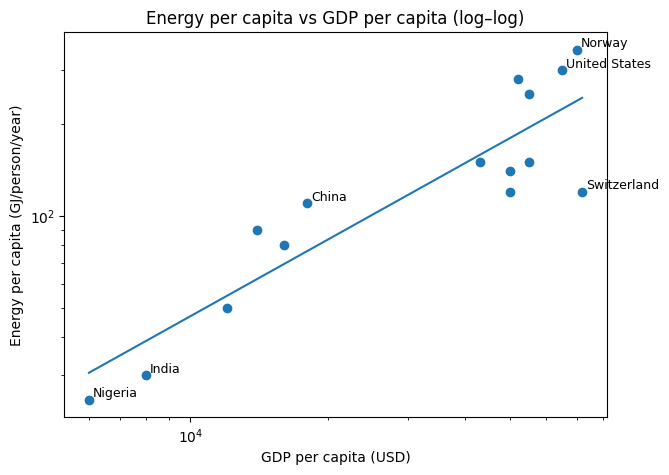

In [7]:
import numpy as np

x = df["gdp_pc"].to_numpy()
y = df["energy_pc_GJ"].to_numpy()

lx = np.log10(x)
ly = np.log10(y)

# simple least squares slope/intercept: ly ≈ b0 + b1*lx
b1, b0 = np.polyfit(lx, ly, 1)

print(f"Estimated log–log slope alpha ≈ {b1:.2f}")
print(f"Intercept log10(c) ≈ {b0:.2f}  -> c ≈ {10**b0:.2g}")

plt.figure(figsize=(7,5))
plt.scatter(df["gdp_pc"], df["energy_pc_GJ"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Energy per capita (GJ/person/year)")
plt.title("Energy per capita vs GDP per capita (log–log)")

# regression line over range
xx = np.logspace(np.log10(x.min()), np.log10(x.max()), 200)
yy = (10**b0) * (xx**b1)
plt.plot(xx, yy)

# label a few points (not all, to avoid clutter)
for name in ["United States", "India", "China", "Norway", "Nigeria", "Switzerland"]:
    r = df[df["country"] == name].iloc[0]
    plt.text(r["gdp_pc"]*1.02, r["energy_pc_GJ"]*1.02, name, fontsize=9)

plt.show()


### 9.2 Plot 2: Population vs total GDP (log–log)

This plot is a nice reminder that:
- GDP per capita is a *per-person* number,
- total GDP is *per-country* and mixes **population scale** and **income scale**.

On log–log, you often see that population alone does not determine total GDP — countries with similar population can differ by orders of magnitude in total GDP.


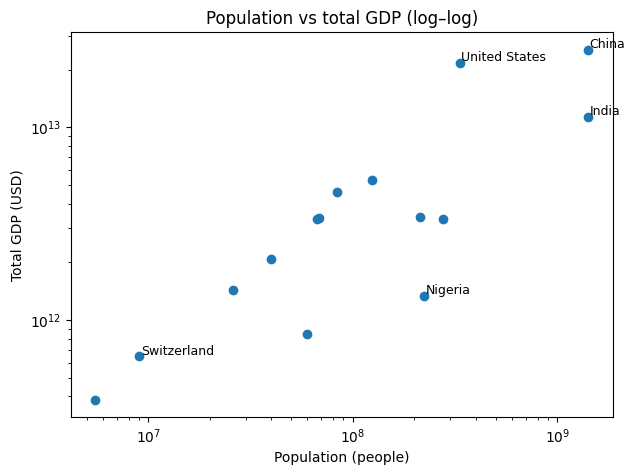

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(df["pop_m"]*1e6, df["gdp_total"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Population (people)")
plt.ylabel("Total GDP (USD)")
plt.title("Population vs total GDP (log–log)")

for name in ["United States", "India", "China", "Nigeria", "Switzerland"]:
    r = df[df["country"] == name].iloc[0]
    plt.text(r["pop_m"]*1e6*1.02, r["gdp_total"]*1.02, name, fontsize=9)

plt.show()


## 10) One more exercise: interpret a log–log slope

Suppose the fitted relationship is:

\$
\text{energy}_{pc} \approx c\, (\text{GDP}_{pc})^{0.6}.
\$

1. If GDP per capita doubles, by what factor does energy per capita change?  
2. If GDP per capita increases by a factor of 10, by what factor does energy per capita change?  
3. Is the relationship sublinear or superlinear? What does that suggest about energy intensity?

<details>
<summary><b>Solution sketch</b></summary>

1. Doubling means ×2. Energy changes by \(2^{0.6}\approx 1.52\) (about +52%).  
2. ×10 implies energy changes by \(10^{0.6}\approx 3.98\) (about ×4).  
3. Since \(0.6<1\), it’s **sublinear**: energy per capita grows more slowly than GDP per capita, consistent with declining energy intensity with income (within this simplified story).
</details>


In [9]:
alpha = 0.6
print("Doubling GDP per capita -> energy factor:", 2**alpha)
print("10x GDP per capita      -> energy factor:", 10**alpha)


Doubling GDP per capita -> energy factor: 1.515716566510398
10x GDP per capita      -> energy factor: 3.9810717055349722


## 11) Takeaways

- An **order of magnitude** is a factor of ~10.
- Scientific notation separates **scale** (`10^b`) from **detail** (`a`).
- Logarithms turn **multiplicative** differences into **additive** differences.
- Log–log plots are a natural habitat for ecological-economic scaling patterns.

If you catch yourself saying “wow that’s huge,” try translating it into:  
**“How many orders of magnitude?”**  
It’s the same emotion, but with a ruler.
